In [1]:
import os
import pydicom
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
from skimage import morphology

from pycm import *

In [30]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [16]:
img_ds = pydicom.read_file("F:/Plaque/MUMC011/1_T1W_SER_1001_sl0003_ph0001.dcm", force = True)
con_ds = pydicom.read_file("F:/Plaque_delin/MUMC011/SER_1001_sl0003_ph0001.dcm", force = True)

In [17]:
img_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
con_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian

In [18]:
img = img_ds.pixel_array
con = con_ds.pixel_array

In [231]:
subs = ['MUMC011', 'MUMC013', 'MUMC014', 'MUMC015', 'MUMC016', 'MUMC017', 'MUMC019', 'MUMC020', 'MUMC021', 'MUMC022', 
        'MUMC024', 'MUMC025', 'MUMC026', 'MUMC027', 'MUMC028', 'MUMC029', 'MUMC030', 'MUMC032', 'MUMC033']

In [232]:
contrasts = ['T1W', 'MPRAGE', 'TOF', 'T2W', 'T1W-PC']

In [65]:
#int_summ = []

for sub in subs: 
    for sl in range (15):
        #int_rec = {}
        for contrast in contrasts:
            
            img_name = glob.glob('F:/Plaque/'+sub+'/*'+contrast+'*sl'+ format(sl+1, '04d') +'*.dcm')[0]
            con_name = glob.glob('F:/Plaque_delin/'+sub+'/*sl'+ format(sl+1, '04d') +'*.dcm')[0]
            
            img_ds = pydicom.read_file(img_name, force = True)
            con_ds = pydicom.read_file(con_name, force = True)
            
            img_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
            con_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
            
            img = img_ds.pixel_array
            con = con_ds.pixel_array
            
            img_min = np.min(img)
            img_max = np.max(img)
            img_range = img_max - img_min
            img_norm = (img - img_min)/img_range
            
            plt.figure(figsize=(15, 15))
            plt.imshow(img_norm)
            plt.contour(con, levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], colors = 'r', linewidths = 1.5)
            plt.axis('off')
            plt.savefig('F:/plaque_overlays/'+sub+'_'+contrast+'_'+str(sl+1)+'.png')
            plt.close()
            
            #int_rec[contrast+'_mean'] = np.mean(img)
            #int_rec[contrast+'_std'] = np.std(img)
            #int_rec[contrast+'_min'] = np.min(img)
            #int_rec[contrast+'_max'] = np.max(img)
            #int_rec[contrast+'_range'] = np.max(img) - np.min(img)
            
        #int_summ.append(int_rec)

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\e.lavrova\AppData\Local\Co

In [233]:
for sub in subs: 
    for sl in range (15):
        for contrast in contrasts:
            
            img_name = glob.glob('F:/Plaque/'+sub+'/*'+contrast+'*sl'+ format(sl+1, '04d') +'*.dcm')[0]
            con_name = glob.glob('F:/Plaque_delin/'+sub+'/*sl'+ format(sl+1, '04d') +'*.dcm')[0]
            
            img_ds = pydicom.read_file(img_name, force = True)
            con_ds = pydicom.read_file(con_name, force = True)
            
            img_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
            con_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
            
            img = img_ds.pixel_array
            con = con_ds.pixel_array
            
            xmin = 1
            ymin = 1
            xmax = con.shape[0]-2
            ymax = con.shape[0]-2

            if np.sum(con)>0: 
                xmin = np.min(np.where(con > 0)[0])
                xmax = np.max(np.where(con > 0)[0])
                ymin = np.min(np.where(con > 0)[1])
                ymax = np.max(np.where(con > 0)[1])
            
            img_min = np.min(img)
            img_max = np.max(img)
            img_range = img_max - img_min
            img_norm = (img - img_min)/img_range
            
            plt.figure(figsize=(10, 10))
            plt.imshow(img_norm[xmin-1:xmax+2, ymin-1:ymax+2])
            plt.contour(con[xmin-1:xmax+2, ymin-1:ymax+2], 
                        levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], colors = 'r', linewidths = 1.5)
            plt.axis('off')
            plt.savefig('F:/plaque_overlays_big/'+sub+'_'+contrast+'_'+str(sl+1)+'.png')
            plt.close()

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:395: UserWarning:


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:396: UserWarning:


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:403: UserWarning:


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:408: UserWarning:


<string>:6: UserWarning:


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\ma\core.py:711: UserWarning:




In [63]:
pd.DataFrame(int_summ)

,MPRAGE_max,MPRAGE_mean,MPRAGE_min,MPRAGE_range,MPRAGE_std,T1W-PC_max,T1W-PC_mean,T1W-PC_min,T1W-PC_range,T1W-PC_std,T1W_max,T1W_mean,T1W_min,T1W_range,T1W_std,T2W_max,T2W_mean,T2W_min,T2W_range,T2W_std,TOF_max,TOF_mean,TOF_min,TOF_range,TOF_std
0,103,5.762468,-1,104,11.621505,1618,138.010370,-35,1653,198.462869,1638,286.423073,0,1638,220.233624,503,50.099665,-31,534,78.046102,0,0.000000,0,0,0.000000
1,101,9.802098,-7,108,15.472416,1625,232.915967,-56,1681,233.645421,1697,299.166760,0,1697,232.847054,1354,140.057023,-21,1375,152.440085,1490,73.696234,-21,1511,119.222498
2,106,10.332630,-5,111,16.050032,1611,263.305114,-39,1650,235.656642,1709,304.811137,0,1709,234.605998,1597,226.877805,-54,1651,171.740914,1689,96.477319,-19,1708,124.738508
3,104,10.403075,-6,110,15.807268,1808,273.957896,-50,1858,244.829088,2173,322.819556,0,2173,258.115315,1333,237.847233,-114,1447,168.405330,2091,89.867320,-39,2130,122.173848
4,103,10.849270,-8,111,15.875142,1755,286.034622,-44,1799,256.026614,2089,322.158470,0,2089,256.535852,1550,238.165013,-101,1651,174.216435,1878,92.768276,-68,1946,118.896226
5,171,11.301179,-7,178,16.055640,1873,298.153736,-104,1977,268.942806,1776,324.533069,0,1776,258.051956,1515,245.289500,-44,1559,181.782563,1615,98.320987,-55,1670,125.756665
6,284,11.738751,-5,289,16.464487,2313,303.915035,-138,2451,277.105129,1907,332.869813,0,1907,266.781140,1553,245.796122,-112,1665,181.716966,1789,102.887949,-29,1818,129.691824
7,209,12.431886,-2,211,16.810232,2008,306.826877,-34,2042,279.644313,2005,349.336759,0,2005,280.548895,1586,248.848944,-53,1639,187.678639,1867,106.963391,-49,1916,131.055007
8,104,13.376937,0,104,17.750135,2268,318.891816,-87,2355,296.641722,2557,360.946220,0,2557,294.927104,1961,249.830733,-117,2078,192.264362,1550,113.040698,-59,1609,135.848137
9,110,13.951662,-6,116,18.437317,2435,332.283198,-142,2577,309.785744,2128,359.353883,0,2128,294.899135,1863,256.276117,-84,1947,200.086354,1779,119.446683,-49,1828,142.801620


In [66]:
pd.DataFrame(int_summ).mean()

MPRAGE_max        94.014035
MPRAGE_mean       10.313051
MPRAGE_min        -3.336842
MPRAGE_range      97.350877
MPRAGE_std        13.974178
T1W-PC_max      1438.445614
T1W-PC_mean      173.139256
T1W-PC_min       -37.052632
T1W-PC_range    1475.498246
T1W-PC_std       184.200531
T1W_max         1246.456140
T1W_mean         187.996397
T1W_min           -0.277193
T1W_range       1246.733333
T1W_std          169.947713
T2W_max         1160.231579
T2W_mean         160.461706
T2W_min          -54.038596
T2W_range       1214.270175
T2W_std          130.229552
TOF_max         1560.105263
TOF_mean          86.681217
TOF_min          -40.522807
TOF_range       1600.628070
TOF_std          118.770546
dtype: float64

In [71]:
for sub in subs: 
    
    if not os.path.isdir('F:/Plaque_contrast/'+sub+'/'):
            os.mkdir('F:/Plaque_contrast/'+sub+'/')
    
    for sl in range (15):
        
        img_precontr_name = glob.glob('F:/Plaque/'+sub+'/*'+'T1W'+'*sl'+ format(sl+1, '04d') +'*.dcm')[0]
        img_pstcontr_name = glob.glob('F:/Plaque/'+sub+'/*'+'T1W-PC'+'*sl'+ format(sl+1, '04d') +'*.dcm')[0]
            
        img_precontr_ds = pydicom.read_file(img_precontr_name, force = True)
        img_pstcontr_ds = pydicom.read_file(img_pstcontr_name, force = True)
            
        img_precontr_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        img_pstcontr_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
            
        img_precontr = img_precontr_ds.pixel_array
        img_pstcontr = img_pstcontr_ds.pixel_array
        
        img_difcontr = img_pstcontr - img_precontr
        
        img_precontr_ds.PixelData = img_difcontr.astype(np.uint16).tostring()
        
        img_precontr_ds.save_as('F:/Plaque_contrast/'+sub+'/'+str(sl)+'.dcm')

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

import scipy as sp

from skimage.feature import canny
from sklearn.cluster import KMeans
from skimage.filters import sobel
from skimage.morphology import watershed

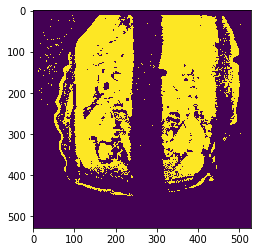

In [125]:
plt.imshow(img>np.mean(img))

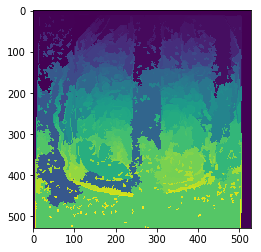

In [126]:
image_felzenszwalb = seg.felzenszwalb(img) 
plt.imshow(image_felzenszwalb)

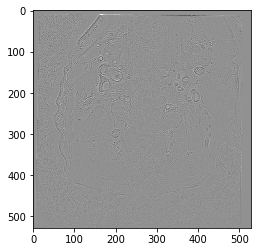

In [127]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
img_laplace = ndimage.convolve(img, kernel_laplace, mode='reflect')
plt.imshow(img_laplace, cmap='gray')

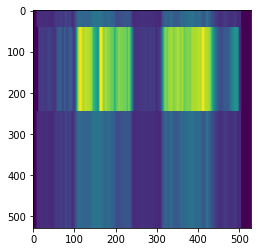

In [128]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(img)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show
plt.imshow(cluster_pic)

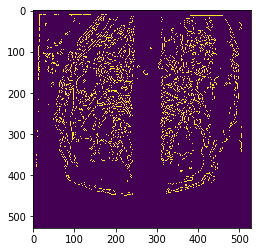

In [129]:
edges = canny(img_norm)
plt.imshow(edges)

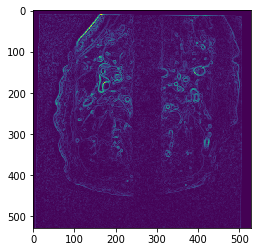

In [130]:
elevation_map = sobel(img)
plt.imshow(elevation_map)

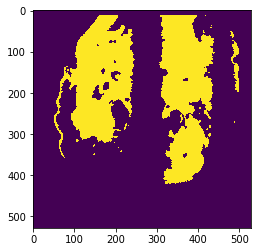

In [131]:
p_low = np.percentile(img, 10)
p_up = np.percentile(img, 90)

markers = np.zeros_like(img)
markers[img <= p_low] = 1
markers[img >= p_up] = 2

segmentation = watershed(elevation_map, markers)

plt.imshow(segmentation)

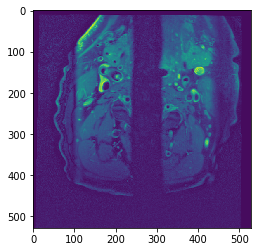

In [132]:
plt.imshow(img)

In [32]:
T1W_name = "F:/Plaque/MUMC011/1_T1W_SER_1001_sl0005_ph0001.dcm"
MPRAGE_name = "F:/Plaque/MUMC011/2_MPRAGE_SER_1101_sl0005_ph0001.dcm"
TOF_name = "F:/Plaque/MUMC011/3_TOF_SER_1201_sl0005_ph0001.dcm"
T2W_name = "F:/Plaque/MUMC011/4_T2W_SER_1301_sl0005_ph0001.dcm"
T1WPC_name = "F:/Plaque/MUMC011/5_T1W-PC_SER_1501_sl0005_ph0001.dcm"

In [33]:
T1W_ds = pydicom.read_file(T1W_name, force = True)
T1W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T1W = T1W_ds.pixel_array

MPRAGE_ds = pydicom.read_file(MPRAGE_name, force = True)
MPRAGE_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
MPRAGE = MPRAGE_ds.pixel_array

TOF_ds = pydicom.read_file(TOF_name, force = True)
TOF_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
TOF = TOF_ds.pixel_array

T2W_ds = pydicom.read_file(T2W_name, force = True)
T2W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T2W = T2W_ds.pixel_array

T1WPC_ds = pydicom.read_file(T1WPC_name, force = True)
T1WPC_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T1WPC = T1WPC_ds.pixel_array

In [34]:
T1W_max = np.max(T1W)
T1W_min = np.min(T1W)
T1W_range = T1W_max - T1W_min

MPRAGE_max = np.max(MPRAGE)
MPRAGE_min = np.min(MPRAGE)
MPRAGE_range = MPRAGE_max - MPRAGE_min

TOF_max = np.max(TOF)
TOF_min = np.min(TOF)
TOF_range = TOF_max - TOF_min

T2W_max = np.max(T2W)
T2W_min = np.min(T2W)
T2W_range = T2W_max - T2W_min

T1WPC_max = np.max(T1WPC)
T1WPC_min = np.min(T1WPC)
T1WPC_range = T1WPC_max - T1WPC_min

In [35]:
T1W_norm = (T1W-T1W_min)/T1W_range
MPRAGE_norm = (MPRAGE-MPRAGE_min)/MPRAGE_range
TOF_norm = (TOF-TOF_min)/TOF_range
T2W_norm = (T2W-T2W_min)/T2W_range
T1WPC_norm = (T1WPC-T1WPC_min)/T1WPC_range

In [36]:
from PIL import Image

rgbArray = np.zeros((T1W_norm.shape[0], T1W_norm.shape[1],3))
rgbArray[..., 0] = T1W_norm*255
rgbArray[..., 1] = MPRAGE_norm*255
rgbArray[..., 2] = TOF_norm*255
rgbImg = Image.fromarray(rgbArray.astype('uint8'), 'RGB')

rgbImg.show()

In [37]:
consensus_norm = (MPRAGE_norm + TOF_norm + T1W_norm)/5

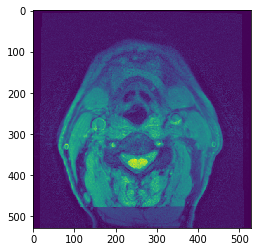

In [38]:
plt.imshow(consensus_norm)

In [39]:
consensus_norm_mask = consensus_norm>np.mean(consensus_norm)
consensus_norm_mask = ndimage.binary_closing(consensus_norm_mask, structure=np.ones((25,25)))
consensus_norm_mask = morphology.remove_small_holes(consensus_norm_mask, 2500, connectivity = 2)

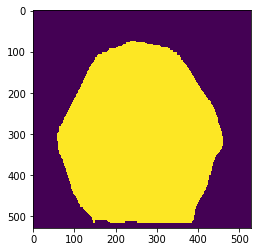

In [40]:
plt.imshow(consensus_norm_mask)

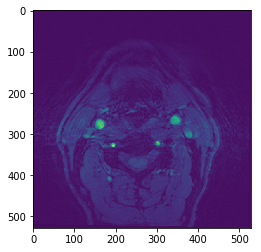

In [41]:
plt.imshow(TOF_norm)

In [42]:
consensus_norm_mask_nan = consensus_norm_mask/consensus_norm_mask

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [43]:
TOF_norm_roi = TOF_norm*consensus_norm_mask_nan

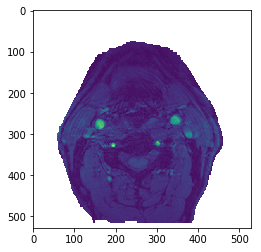

In [44]:
plt.imshow(TOF_norm_roi)

In [45]:
TOF_norm_roi_mean = np.nanmean(TOF_norm_roi)
TOF_norm_roi_std = np.nanstd(TOF_norm_roi)

In [46]:
TOF_norm_roi_z = (TOF_norm-TOF_norm_roi_mean)/TOF_norm_roi_std

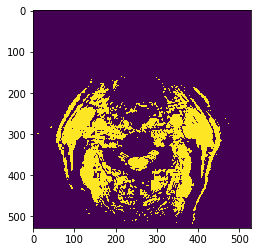

In [47]:
plt.imshow(TOF_norm_roi_z>3*TOF_norm_roi_std)

In [96]:
def contrast_map(image_input, window_size):
    
    dim = image_input.shape
    max_global = np.max(image_input)
    min_global = np.min(image_input)
    
    image_output = np.zeros(dim, 'float64')
    
    for i in range (window_size//2, dim[0]-window_size//2):
        for j in range (window_size//2, dim[1]-window_size//2):  
            
            image_local = image_input[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2]
            max_local = np.max(image_local)
            min_local = np.min(image_local)
            image_output[i, j] = (max_local-min_global)/(max_global-min_global)
            
    return (image_output)
            
            

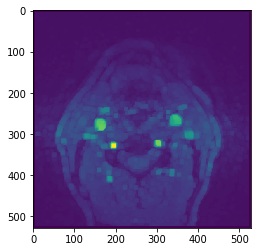

In [97]:
c_map = contrast_map(TOF_norm, 9)
plt.imshow(c_map)

In [95]:
th = np.percentile(TOF_norm, 99.5)

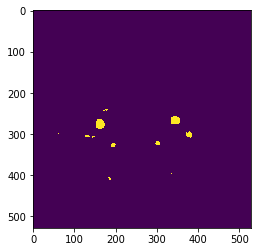

In [91]:
plt.imshow(TOF_norm>th)

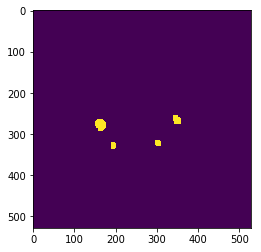

In [98]:
plt.imshow(c_map>np.percentile(c_map, 99.5))

In [241]:
subs = ['MUMC011', 'MUMC013', 'MUMC014', 'MUMC015', 'MUMC016', 'MUMC017', 'MUMC019', 'MUMC020', 'MUMC021', 'MUMC022', 
        'MUMC024', 'MUMC025', 'MUMC026', 'MUMC028', 'MUMC029', 'MUMC030', 'MUMC032', 'MUMC033']
contrasts = ['T1W', 'MPRAGE', 'TOF', 'T2W', 'T1W-PC']
rois = [1, 2, 3, 4, 6]    

int_values = []

for sub in subs: 
    
    con_dir_name = 'F:/Plaque_delin/'+sub+'/'
    sls = []
    for item in os.listdir(con_dir_name):
        con_file_name = os.path.join(con_dir_name, item)
        if os.path.isfile(con_file_name)&('.dcm' in con_file_name):
            con_file_name_parts = item.split('_')
            sls.append(int(con_file_name_parts[2][2:]))
            
    for sl in sls:
        
        con_name = glob.glob('F:/Plaque_delin/'+sub+'/*sl'+ format(sl, '04d') +'*.dcm')[0]
        con_ds = pydicom.read_file(con_name, force = True)
        con_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        con = con_ds.pixel_array
        
        for roi in rois:
            
            sub_int_values = {'roi': roi, 'sub': sub}
            
            mask = (con == roi)
            mask = mask/mask
            
            for contrast in contrasts:
                
                img_name = glob.glob('F:/Plaque/'+sub+'/*'+contrast+'*sl'+ format(sl, '04d') +'*.dcm')[0]
                img_ds = pydicom.read_file(img_name, force = True)
                img_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
                img = img_ds.pixel_array
                
                img_max = np.max(img)
                img_min = np.min(img)
                img_norm = (img-img_min)/(img_max-img_min)
                
                img_masked = img_norm*mask
                sub_int_values[contrast] = img_masked[~np.isnan(img_masked)].flatten()
                
            int_values.append(sub_int_values)

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning:

invalid value encountered in true_divide



In [242]:
int_values_df = pd.DataFrame(int_values)

In [243]:
int_values_df.loc[int_values_df['roi']==1]

,MPRAGE,T1W,T1W-PC,T2W,TOF,roi,sub
0,"[0.26851851851851855, 0.25925925925925924, 0.2...","[0.4036535061873895, 0.3252799057159694, 0.289...","[0.355145746579417, 0.27186198691255203, 0.239...","[0.22254545454545455, 0.19345454545454546, 0.1...","[0.5473196558570483, 0.5744540039708802, 0.585...",1,MUMC011
5,"[0.2072072072072072, 0.1981981981981982, 0.198...","[0.31480397893504974, 0.27735517846693974, 0.2...","[0.4896969696969697, 0.4618181818181818, 0.413...","[0.25923682616596, 0.23682616596002423, 0.2016...","[0.5983606557377049, 0.6206088992974239, 0.635...",1,MUMC011
10,"[0.33636363636363636, 0.33636363636363636, 0.3...","[0.29682466635987115, 0.2834790612057064, 0.29...","[0.4381054897739505, 0.4085037674919268, 0.390...","[0.36074637180373187, 0.39322736696613686, 0.4...","[0.33568075117370894, 0.34178403755868547, 0.3...",1,MUMC011
15,"[0.3783783783783784, 0.38738738738738737, 0.39...","[0.2795595978937291, 0.29439923408329344, 0.30...","[0.29294052251250696, 0.3051695386325737, 0.35...","[0.2768019382192611, 0.31617201695941854, 0.32...","[0.31397738951695786, 0.3211716341212744, 0.32...",1,MUMC011
20,"[0.20786516853932585, 0.20786516853932585, 0.2...","[0.3327702702702703, 0.2894144144144144, 0.277...","[0.3353566009104704, 0.29742033383915023, 0.29...","[0.33098139833226425, 0.2771007055805003, 0.24...","[0.44610778443113774, 0.5011976047904192, 0.54...",1,MUMC011
25,"[0.1314878892733564, 0.13494809688581316, 0.14...","[0.3534347142108023, 0.3287886733088621, 0.235...","[0.22807017543859648, 0.21011831905344758, 0.2...","[0.3015015015015015, 0.27627627627627627, 0.24...","[0.2733773377337734, 0.30198019801980197, 0.27...",1,MUMC011
30,"[0.0995260663507109, 0.09004739336492891, 0.10...","[0.3750623441396509, 0.371072319201995, 0.3785...","[0.35798237022526935, 0.32908912830558273, 0.3...","[0.5064063453325198, 0.40390482001220257, 0.32...","[0.2291231732776618, 0.2740083507306889, 0.312...",1,MUMC011
35,"[0.22115384615384615, 0.17307692307692307, 0.1...","[0.23738756355103638, 0.1697301525224873, 0.12...","[0.30530785562632695, 0.2615711252653928, 0.22...","[0.20259865255052936, 0.15640038498556305, 0.1...","[0.30205096333126163, 0.5034182722187694, 0.67...",1,MUMC011
40,"[0.27586206896551724, 0.23275862068965517, 0.1...","[0.3082706766917293, 0.31390977443609025, 0.31...","[0.2285603414823438, 0.2599922390376407, 0.282...","[0.24807395993836673, 0.22496147919876733, 0.2...","[0.40700218818380746, 0.36433260393873085, 0.3...",1,MUMC011
45,"[0.2803738317757009, 0.2523364485981308, 0.261...","[0.23976608187134502, 0.22357174988753936, 0.2...","[0.3831367409349061, 0.4032328527741372, 0.395...","[0.08566978193146417, 0.09241952232606439, 0.1...","[0.4487519915029209, 0.4530005310674456, 0.447...",1,MUMC011


In [250]:
counter = 0

for i in range (len (int_values_df.loc[int_values_df['roi']==6]['MPRAGE'])):
    if len(int_values_df.loc[int_values_df['roi']==6]['MPRAGE'].iloc[i])>0:
        counter += 1
        
print (counter)

25


actual rois: 0, 1, 2, 3, 4, 6

In [251]:
int_points = []

for i in range (len(int_values_df)):
    for j in range (len(int_values_df.iloc[i]['MPRAGE'])):
        int_point = {'roi': str(int_values_df.iloc[i]['roi']), 
                     'MPRAGE': int_values_df.iloc[i]['MPRAGE'][j], 
                     'T1W': int_values_df.iloc[i]['T1W'][j], 
                     'T1W-PC': int_values_df.iloc[i]['T1W-PC'][j], 
                     'T2W': int_values_df.iloc[i]['T2W'][j], 
                     'TOF': int_values_df.iloc[i]['TOF'][j]}
        int_points.append(int_point)

In [252]:
int_points_df = pd.DataFrame(int_points)

In [466]:
conditions = [
    (int_points_df['roi'] == '1'),
    (int_points_df['roi'] == '2'),
    (int_points_df['roi'] == '3'),
    (int_points_df['roi'] == '4'), 
    (int_points_df['roi'] == '6')]
choices = ['lumen', 'vessel wall', 'lipid', 'calcium', 'haemorrhage']
int_points_df['ROI'] = np.select(conditions, choices, default='vessel wall')

In [469]:
import plotly.express as px
import plotly

fig = px.scatter_3d(int_points_df, x='MPRAGE', y='TOF', z='T1W-PC', color='ROI')
plotly.offline.plot(fig, filename='roi_contrast space.html', config={'scrollZoom': True})

'roi_contrast space.html'

In [470]:
import plotly.express as px
import plotly

fig = px.scatter_3d(int_points_df.loc[(int_points_df.roi != '1')&(int_points_df.roi != '2')], x='MPRAGE', y='TOF', z='T1W', color='ROI')
plotly.offline.plot(fig, filename='roi_contrast space.html', config={'scrollZoom': True})

'roi_contrast space.html'

In [277]:
c_MPRAGE = np.mean(int_points_df.loc[int_points_df.roi == '1'].MPRAGE.values)
c_T1W = np.mean(int_points_df.loc[int_points_df.roi == '1'].T1W.values)
c_T2W = np.mean(int_points_df.loc[int_points_df.roi == '1'].T2W.values)
c_T1WPC = np.mean(int_points_df.loc[int_points_df.roi == '1']['T1W-PC'].values)
c_TOF = np.mean(int_points_df.loc[int_points_df.roi == '1'].TOF.values)

In [619]:
T1W_name = "F:/Plaque/MUMC011/1_T1W_SER_1001_sl0005_ph0001.dcm"
MPRAGE_name = "F:/Plaque/MUMC011/2_MPRAGE_SER_1101_sl0005_ph0001.dcm"
TOF_name = "F:/Plaque/MUMC011/3_TOF_SER_1201_sl0005_ph0001.dcm"
T2W_name = "F:/Plaque/MUMC011/4_T2W_SER_1301_sl0005_ph0001.dcm"
T1WPC_name = "F:/Plaque/MUMC011/5_T1W-PC_SER_1501_sl0005_ph0001.dcm"

In [620]:
con_name = "F:/Plaque_delin/MUMC011/SER_1001_sl0005_ph0001.dcm"
con_ds = pydicom.read_file(con_name, force = True)
con_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
con = con_ds.pixel_array

In [621]:
T1W_ds = pydicom.read_file(T1W_name, force = True)
T1W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T1W = T1W_ds.pixel_array

MPRAGE_ds = pydicom.read_file(MPRAGE_name, force = True)
MPRAGE_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
MPRAGE = MPRAGE_ds.pixel_array

TOF_ds = pydicom.read_file(TOF_name, force = True)
TOF_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
TOF = TOF_ds.pixel_array

T2W_ds = pydicom.read_file(T2W_name, force = True)
T2W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T2W = T2W_ds.pixel_array

T1WPC_ds = pydicom.read_file(T1WPC_name, force = True)
T1WPC_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T1WPC = T1WPC_ds.pixel_array

In [622]:
T1W_max = np.max(T1W)
T1W_min = np.min(T1W)
T1W_range = T1W_max - T1W_min

MPRAGE_max = np.max(MPRAGE)
MPRAGE_min = np.min(MPRAGE)
MPRAGE_range = MPRAGE_max - MPRAGE_min

TOF_max = np.max(TOF)
TOF_min = np.min(TOF)
TOF_range = TOF_max - TOF_min

T2W_max = np.max(T2W)
T2W_min = np.min(T2W)
T2W_range = T2W_max - T2W_min

T1WPC_max = np.max(T1WPC)
T1WPC_min = np.min(T1WPC)
T1WPC_range = T1WPC_max - T1WPC_min

In [623]:
T1W_norm = (T1W-T1W_min)/T1W_range
MPRAGE_norm = (MPRAGE-MPRAGE_min)/MPRAGE_range
TOF_norm = (TOF-TOF_min)/TOF_range
T2W_norm = (T2W-T2W_min)/T2W_range
T1WPC_norm = (T1WPC-T1WPC_min)/T1WPC_range

In [624]:
import math

lumen_pmap = np.zeros(T1W_norm.shape)

for i in range (T1W_norm.shape[0]):
    for j in range (T1W_norm.shape[1]):
        
        c_dist = math.sqrt((MPRAGE_norm[i,j]-c_MPRAGE)**2+(T1W_norm[i,j]-c_T1W)**2+(TOF_norm[i,j]-c_TOF)**2)
        lumen_pmap[i, j] = c_dist

In [625]:
lumen_pmap_smoothed = sp.ndimage.median_filter(lumen_pmap, size = (5, 5))
#lumen_pmap_smoothed = sp.ndimage.gaussian_filter(lumen_pmap_smoothed, sigma=5) 

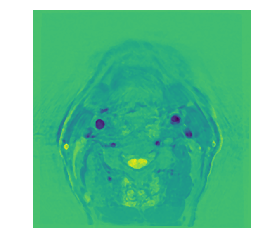

In [626]:
plt.imshow(lumen_pmap_smoothed)
plt.axis('off')
plt.show()

In [627]:
lumen_pmap_smoothed_bin = lumen_pmap_smoothed<=np.percentile(lumen_pmap_smoothed, 0.5)

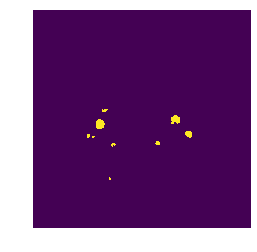

In [628]:
plt.imshow(lumen_pmap_smoothed_bin)
plt.axis('off')
plt.show()

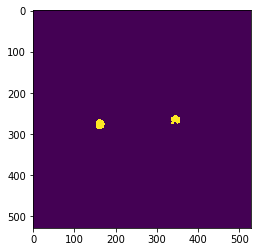

In [629]:
from skimage.measure import label, regionprops
label_image = label(lumen_pmap_smoothed_bin)

ss = []
for i in range (1, np.max(label_image)):
    ss.append({'label': i, 's': np.sum(label_image == i)})
    
ss = pd.DataFrame(ss)
ss.sort_values(by = 's', ascending = False, inplace = True)
ss.set_index('label', inplace = True)
labels = [ss.index.values.tolist()[0], ss.index.values.tolist()[1]]
lumen_cont = (label_image == labels[0]) + (label_image == labels[1])
plt.imshow(lumen_cont)
plt.show()

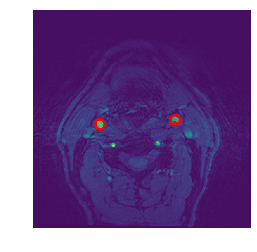

In [630]:
plt.imshow(TOF_norm)
plt.contour(lumen_cont, colors = ['r'])
plt.axis('off')
plt.show()

In [631]:
con_lumen = con == 1

In [632]:
con_xmin = 1
con_ymin = 1
con_xmax = con.shape[0]-2
con_ymax = con.shape[0]-2

if np.sum(con)>0:
    con_xmin = np.min(np.where(con_lumen > 0)[0])
    con_xmax = np.max(np.where(con_lumen > 0)[0])
    con_ymin = np.min(np.where(con_lumen > 0)[1])
    con_ymax = np.max(np.where(con_lumen > 0)[1])

In [633]:
from scipy.spatial import distance
1-distance.dice(con_lumen[con_xmin-10:con_xmax+10, con_ymin-10:con_ymax+10].flatten(), 
                lumen_cont[con_xmin-10:con_xmax+10, con_ymin-10:con_ymax+10].flatten())

0.9428571428571428

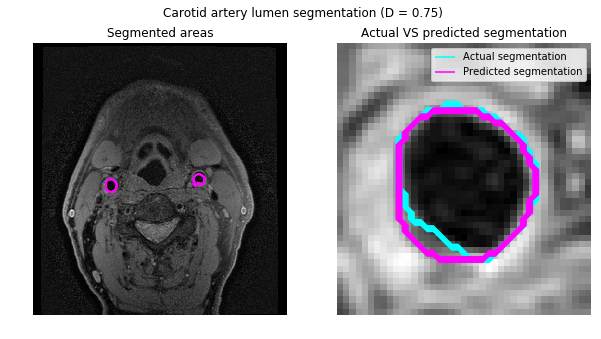

In [653]:
fig = plt.figure(figsize=(10, 5), )

plt.subplot(1, 2, 1)
plt.imshow(T1W_norm, cmap = 'gray', aspect="auto")
plt.contour(lumen_cont, colors = ['magenta'])
plt.title('Segmented areas')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(T1W_norm[con_xmin-10:con_xmax+10, con_ymin-10:con_ymax+10], cmap = 'gray', aspect="auto")
cs_true = plt.contour(con_lumen[con_xmin-10:con_xmax+10, con_ymin-10:con_ymax+10], colors = ['cyan'])
cs_pred = plt.contour(lumen_cont[con_xmin-10:con_xmax+10, con_ymin-10:con_ymax+10], colors = ['magenta'])
cs_true.collections[0].set_label('Actual segmentation')
cs_pred.collections[0].set_label('Predicted segmentation')
plt.title('Actual VS predicted segmentation')
plt.legend()
plt.axis('off')

fig.suptitle('Carotid artery lumen segmentation (D = 0.75)')
plt.show()

In [402]:
subs = ['MUMC011', 'MUMC013', 'MUMC014', 'MUMC015', 'MUMC016', 'MUMC017', 'MUMC019', 'MUMC020', 'MUMC021', 'MUMC022', 
        'MUMC024', 'MUMC025', 'MUMC026', 'MUMC028', 'MUMC029', 'MUMC030', 'MUMC032', 'MUMC033']
contrasts = ['T1W', 'MPRAGE', 'TOF', 'T2W', 'T1W-PC']
rois = [1, 2, 3, 4, 6]    

dices = []

for sub in subs: 
    
    con_dir_name = 'F:/Plaque_delin/'+sub+'/'
    sls = []
    for item in os.listdir(con_dir_name):
        con_file_name = os.path.join(con_dir_name, item)
        if os.path.isfile(con_file_name)&('.dcm' in con_file_name):
            con_file_name_parts = item.split('_')
            sls.append(int(con_file_name_parts[2][2:]))
            
    for sl in sls:
        
        con_name = glob.glob('F:/Plaque_delin/'+sub+'/*sl'+ format(sl, '04d') +'*.dcm')[0]
        con_ds = pydicom.read_file(con_name, force = True)
        con_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        con = con_ds.pixel_array
        
        T1W_name = glob.glob('F:/Plaque/'+sub+'/*'+'T1W'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        T1W_ds = pydicom.read_file(T1W_name, force = True)
        T1W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        T1W = T1W_ds.pixel_array    
        T1W_max = np.max(T1W)
        T1W_min = np.min(T1W)
        T1W_norm = (T1W-T1W_min)/(T1W_max-T1W_min)
        
        T2W_name = glob.glob('F:/Plaque/'+sub+'/*'+'T2W'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        T2W_ds = pydicom.read_file(T2W_name, force = True)
        T2W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        T2W = T2W_ds.pixel_array    
        T2W_max = np.max(T2W)
        T2W_min = np.min(T2W)
        T2W_norm = (T2W-T2W_min)/(T2W_max-T2W_min)
        
        TOF_name = glob.glob('F:/Plaque/'+sub+'/*'+'TOF'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        TOF_ds = pydicom.read_file(TOF_name, force = True)
        TOF_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        TOF = TOF_ds.pixel_array    
        TOF_max = np.max(TOF)
        TOF_min = np.min(TOF)
        TOF_norm = (TOF-TOF_min)/(TOF_max-TOF_min)
        
        T1WPC_name = glob.glob('F:/Plaque/'+sub+'/*'+'T1W-PC'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        T1WPC_ds = pydicom.read_file(T1WPC_name, force = True)
        T1WPC_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        T1WPC = T1WPC_ds.pixel_array    
        T1WPC_max = np.max(T1WPC)
        T1WPC_min = np.min(T1WPC)
        T1WPC_norm = (T1WPC-T1WPC_min)/(T1WPC_max-T1WPC_min)
        
        MPRAGE_name = glob.glob('F:/Plaque/'+sub+'/*'+'MPRAGE'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        MPRAGE_ds = pydicom.read_file(MPRAGE_name, force = True)
        MPRAGE_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        MPRAGE = MPRAGE_ds.pixel_array    
        MPRAGE_max = np.max(MPRAGE)
        MPRAGE_min = np.min(MPRAGE)
        MPRAGE_norm = (MPRAGE-MPRAGE_min)/(MPRAGE_max-MPRAGE_min)
        
        lumen_pmap = np.zeros(T1W_norm.shape)
        for i in range (T1W_norm.shape[0]):
            for j in range (T1W_norm.shape[1]):
                c_dist = math.sqrt((MPRAGE_norm[i,j]-c_MPRAGE)**2+(T1W_norm[i,j]-c_T1W)**2+(TOF_norm[i,j]-c_TOF)**2+(T1WPC_norm[i,j]-c_T1WPC)**2+(T2W_norm[i,j]-c_T2W)**2)
                lumen_pmap[i, j] = c_dist
        lumen_pmap_smoothed = sp.ndimage.median_filter(lumen_pmap, size = (5, 5))
        lumen_pmap_smoothed_bin = lumen_pmap_smoothed<=np.percentile(lumen_pmap_smoothed, 0.5)
        
        label_image = label(lumen_pmap_smoothed_bin)
        ss = []
        for i in range (1, np.max(label_image)):
            ss.append({'label': i, 's': np.sum(label_image == i)})
        ss = pd.DataFrame(ss)
        ss.sort_values(by = 's', ascending = False, inplace = True)
        ss.set_index('label', inplace = True)
        labels = [ss.index.values.tolist()[0], ss.index.values.tolist()[1]]
        lumen_con_pred = (label_image == labels[0]) + (label_image == labels[1])
        
        lumen_con_gt = con == 1
        con_xmin = 1
        con_ymin = 1
        con_xmax = lumen_con_gt.shape[0]-2
        con_ymax = lumen_con_gt.shape[1]-2
        if np.sum(lumen_con_gt)>0:
            con_xmin = np.min(np.where(lumen_con_gt > 0)[0])
            con_xmax = np.max(np.where(lumen_con_gt > 0)[0])
            con_ymin = np.min(np.where(lumen_con_gt > 0)[1])
            con_ymax = np.max(np.where(lumen_con_gt > 0)[1])
        dice = 1-distance.dice(lumen_con_pred[con_xmin-10:con_xmax+10, con_ymin-10:con_ymax+10].flatten(),
                               lumen_con_gt[con_xmin-10:con_xmax+10, con_ymin-10:con_ymax+10].flatten())
        dices.append(dice) 

In [405]:
dices = [0.9319727891156463, 0.962457337883959, 0.9608938547486033, 0.9230769230769231, 0.881578947368421, 0.913946587537092, 0.795221843003413, 0.47491638795986624, 0.7977315689981097, 0.915, 0.8979591836734694, 0.9291338582677166, 0.7566265060240964, 0.8516678495386799, 0.5617647058823529, 0.8021108179419525, 0.802439024390244, 0.8245067497403946, 0.7361963190184049, 0.7484116899618806, 0.4374364191251272, 0.827906976744186, 0.8298850574712644, 0.8364928909952607, 0.904487917146145, 0.9546666666666667, 0.905693950177936, 0.9627791563275434, 0.7917948717948717, 0.49104859335038364, 0.3729838709677419, 0.8702928870292888, 0.6287519747235387, 0.4656616415410385, 0.44049733570159855, 0.49818181818181817, 0.627906976744186, 0.9060150375939849, 0.9321663019693655, 0.6650602409638554, 0.8449197860962567, 0.8539682539682539, 0.8125, 0.8496420047732697, 0.6164623467600701, 0.9041591320072333, 0.8, 0.9065255731922399, 0.739612188365651, 0.9180327868852459, 0.917098445595855, 0.964735516372796, 0.9440203562340967, 0.936829558998808, 0.9464508094645081, 0.8706240487062404, 0.7659574468085106, 0.6, 0.6832061068702291, 0.7146739130434783, 0.8059149722735675, 0.7439824945295405, 0.938090241343127, 0.8205128205128205, 0.929889298892989, 0.7539568345323742, 0.7689922480620155, 0.6658227848101266, 0.7136507936507936, 0.7970065481758652, 0.7769347496206374, 0.8802816901408451, 0.8259668508287292, 0.9163346613545816, 0.9457700650759219, 0.9227272727272727, 0.37302977232924694, 0.015564202334630295, 0.43489583333333337, 0.7769784172661871, 0.7234567901234568, 0.6829971181556196, 0.7879799666110183, 0.9134751773049645, 0.6308724832214765, 0.15671641791044777, 0.6437291897891232, 0.7811158798283262, 0.8547215496368039, 0.48944337811900196, 0.8296744890234671, 0.9215686274509804, 0.9052924791086351, 0.9281914893617021, 0.8737137511693172, 0.896551724137931, 0.8074679113185531, 0.8904428904428905, 0.9511002444987775, 0.9241573033707865, 0.8783505154639175, 0.9425837320574163, 0.9424657534246575, 0.9152542372881356, 0.7738853503184713, 0.6573816155988859, 0.6956521739130435, 0.8356164383561644, 0.9371196754563894, 0.8565488565488566, 0.6309963099630996, 0.7176684881602915, 0.7978436657681941, 0.7447154471544715, 0.8200734394124847, 0.8779284833538841, 0.9114927344782034, 0.8122866894197952, 0.6570841889117043, 0.7208008898776419]

In [407]:
np.mean(dices)

0.7827621825066112

In [517]:
from sklearn import neighbors
from sklearn.neighbors import NearestCentroid

NN_space = np.array(int_points_df.iloc[len(int_points_df)//3:])[:, :-2]
NN_y = int_points_df.iloc[len(int_points_df)//3:].roi.values.astype(int)

n_neighbors = 25

model_NN = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
model_NN.fit(NN_space, NN_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='distance')

In [518]:
T1W_name = "F:/Plaque/MUMC011/1_T1W_SER_1001_sl0005_ph0001.dcm"
MPRAGE_name = "F:/Plaque/MUMC011/2_MPRAGE_SER_1101_sl0005_ph0001.dcm"
TOF_name = "F:/Plaque/MUMC011/3_TOF_SER_1201_sl0005_ph0001.dcm"
T2W_name = "F:/Plaque/MUMC011/4_T2W_SER_1301_sl0005_ph0001.dcm"
T1WPC_name = "F:/Plaque/MUMC011/5_T1W-PC_SER_1501_sl0005_ph0001.dcm"

con_name = "F:/Plaque_delin/MUMC011/SER_1001_sl0005_ph0001.dcm"
con_ds = pydicom.read_file(con_name, force = True)
con_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
con = con_ds.pixel_array

T1W_ds = pydicom.read_file(T1W_name, force = True)
T1W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T1W = T1W_ds.pixel_array

MPRAGE_ds = pydicom.read_file(MPRAGE_name, force = True)
MPRAGE_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
MPRAGE = MPRAGE_ds.pixel_array

TOF_ds = pydicom.read_file(TOF_name, force = True)
TOF_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
TOF = TOF_ds.pixel_array

T2W_ds = pydicom.read_file(T2W_name, force = True)
T2W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T2W = T2W_ds.pixel_array

T1WPC_ds = pydicom.read_file(T1WPC_name, force = True)
T1WPC_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
T1WPC = T1WPC_ds.pixel_array

T1W_max = np.max(T1W)
T1W_min = np.min(T1W)
T1W_range = T1W_max - T1W_min

MPRAGE_max = np.max(MPRAGE)
MPRAGE_min = np.min(MPRAGE)
MPRAGE_range = MPRAGE_max - MPRAGE_min

TOF_max = np.max(TOF)
TOF_min = np.min(TOF)
TOF_range = TOF_max - TOF_min

T2W_max = np.max(T2W)
T2W_min = np.min(T2W)
T2W_range = T2W_max - T2W_min

T1WPC_max = np.max(T1WPC)
T1WPC_min = np.min(T1WPC)
T1WPC_range = T1WPC_max - T1WPC_min

T1W_norm = (T1W-T1W_min)/T1W_range
MPRAGE_norm = (MPRAGE-MPRAGE_min)/MPRAGE_range
TOF_norm = (TOF-TOF_min)/TOF_range
T2W_norm = (T2W-T2W_min)/T2W_range
T1WPC_norm = (T1WPC-T1WPC_min)/T1WPC_range

preds = np.zeros(con.shape)

for i in range (0, con.shape[0]):
    for j in range (0, con.shape[1]):
        con_pred = model_NN.predict(np.array([MPRAGE_norm[i, j], T1W_norm[i, j], 
                                              T1WPC_norm[i, j], T2W_norm[i, j], TOF_norm[i, j]]).reshape(1, -1))
        preds[i, j] = con_pred[0]
        
preds_con = preds*(con>0)

xmin = 1
ymin = 1
xmax = con.shape[0]-2
ymax = con.shape[0]-2

xmin = np.min(np.where(con > 0)[0])
xmax = np.max(np.where(con > 0)[0])
ymin = np.min(np.where(con > 0)[1])
ymax = np.max(np.where(con > 0)[1])

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(con[xmin-1:xmax+2, ymin-1:ymax+2], vmin = 0, vmax = 6)
plt.title('Actual segmentation')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preds_con[xmin-1:xmax+2, ymin-1:ymax+2], vmin = 0, vmax = 6)
plt.title('Predicted segmentation')
plt.axis('off')

plt.savefig('F:/plaque_seg_res/'+sub+'_'+str(sl+1)+'.png')
plt.close()

act_vector = []
prd_vector = []

for i,j in zip(np.where(con>0)[0], np.where(con>0)[1]):
        act_vector.append(con[i,j])
        prd_vector.append(int(preds_con[i,j]))

        
cm = ConfusionMatrix(actual_vector=act_vector, predict_vector=prd_vector)
print(cm)       

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 2


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 3


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 4


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 5
MUMC011 6


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 7
MUMC011 8


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 9


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 10


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 11


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 12


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 13


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 14


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC011 15


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 1


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 2


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 3


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 4


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 5


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 6


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 7
MUMC013 8


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 9


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 10


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 11


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 12


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 13


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 14


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC013 15


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 2


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 3


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 4


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 5


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 6


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 7


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 8


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 9


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 10


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 11


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 12


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 13


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 14


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC014 15


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 2


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 3


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 4


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 5


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 6


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 7


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 8


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 9


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 10


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



MUMC015 11


C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning:

No contour levels were found within the data range.



FileNotFoundError: [Errno 2] No such file or directory: 'F:/plaque_seg_res/MUMC015_12.png'

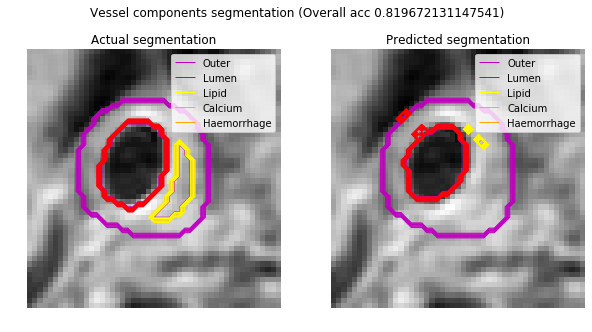

In [672]:
subs = ['MUMC011', 'MUMC013', 'MUMC014', 'MUMC015', 'MUMC016', 'MUMC017', 'MUMC019', 'MUMC020', 'MUMC021', 'MUMC022', 
        'MUMC024', 'MUMC025', 'MUMC026', 'MUMC028', 'MUMC029', 'MUMC030', 'MUMC032', 'MUMC033']
contrasts = ['T1W', 'MPRAGE', 'TOF', 'T2W', 'T1W-PC']
rois = [1, 2, 3, 4, 6]    

accs = []

for sub in subs[:6]: 
    
    con_dir_name = 'F:/Plaque_delin/'+sub+'/'
    sls = []
    for item in os.listdir(con_dir_name):
        con_file_name = os.path.join(con_dir_name, item)
        if os.path.isfile(con_file_name)&('.dcm' in con_file_name):
            con_file_name_parts = item.split('_')
            sls.append(int(con_file_name_parts[2][2:]))
            
    for sl in sls:
        
        con_name = glob.glob('F:/Plaque_delin/'+sub+'/*sl'+ format(sl, '04d') +'*.dcm')[0]
        con_ds = pydicom.read_file(con_name, force = True)
        con_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        con = con_ds.pixel_array
        
        T1W_name = glob.glob('F:/Plaque/'+sub+'/*'+'T1W'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        T1W_ds = pydicom.read_file(T1W_name, force = True)
        T1W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        T1W = T1W_ds.pixel_array    
        T1W_max = np.max(T1W)
        T1W_min = np.min(T1W)
        T1W_norm = (T1W-T1W_min)/(T1W_max-T1W_min)
        
        T2W_name = glob.glob('F:/Plaque/'+sub+'/*'+'T2W'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        T2W_ds = pydicom.read_file(T2W_name, force = True)
        T2W_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        T2W = T2W_ds.pixel_array    
        T2W_max = np.max(T2W)
        T2W_min = np.min(T2W)
        T2W_norm = (T2W-T2W_min)/(T2W_max-T2W_min)
        
        TOF_name = glob.glob('F:/Plaque/'+sub+'/*'+'TOF'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        TOF_ds = pydicom.read_file(TOF_name, force = True)
        TOF_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        TOF = TOF_ds.pixel_array    
        TOF_max = np.max(TOF)
        TOF_min = np.min(TOF)
        TOF_norm = (TOF-TOF_min)/(TOF_max-TOF_min)
        
        T1WPC_name = glob.glob('F:/Plaque/'+sub+'/*'+'T1W-PC'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        T1WPC_ds = pydicom.read_file(T1WPC_name, force = True)
        T1WPC_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        T1WPC = T1WPC_ds.pixel_array    
        T1WPC_max = np.max(T1WPC)
        T1WPC_min = np.min(T1WPC)
        T1WPC_norm = (T1WPC-T1WPC_min)/(T1WPC_max-T1WPC_min)
        
        MPRAGE_name = glob.glob('F:/Plaque/'+sub+'/*'+'MPRAGE'+'*sl'+ format(sl, '04d') +'*.dcm')[0]
        MPRAGE_ds = pydicom.read_file(MPRAGE_name, force = True)
        MPRAGE_ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        MPRAGE = MPRAGE_ds.pixel_array    
        MPRAGE_max = np.max(MPRAGE)
        MPRAGE_min = np.min(MPRAGE)
        MPRAGE_norm = (MPRAGE-MPRAGE_min)/(MPRAGE_max-MPRAGE_min)
        
        preds = np.zeros(con.shape)

        for i in range (0, con.shape[0]):
            for j in range (0, con.shape[1]):
                con_pred = model_NN.predict(np.array([MPRAGE_norm[i, j], T1W_norm[i, j], 
                                                      T1WPC_norm[i, j], T2W_norm[i, j], TOF_norm[i, j]]).reshape(1, -1))
                preds[i, j] = con_pred[0]

        preds_con = preds*(con>0)
        
        act_vector = []
        prd_vector = []

        for i,j in zip(np.where(con>0)[0], np.where(con>0)[1]):
            act_vector.append(con[i,j])
            prd_vector.append(int(preds_con[i,j]))


        cm = ConfusionMatrix(actual_vector=act_vector, predict_vector=prd_vector)
        accs.append(cm.Overall_ACC)       

        xmin = 1
        ymin = 1
        xmax = con.shape[0]-2
        ymax = con.shape[0]-2

        xmin = np.min(np.where(con > 0)[0])
        xmax = np.max(np.where(con > 0)[0])
        ymin = np.min(np.where(con > 0)[1])
        ymax = np.max(np.where(con > 0)[1])

        fig = plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(T1W_norm[xmin-10:xmax+15, ymin-10:ymax+15], cmap = 'gist_gray')
        cs2=plt.contour((con == 2)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['m'], linewidths = 1)
        cs2.collections[0].set_label('Outer')
        cs1=plt.contour((con == 1)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['r'], linewidths = 1)
        cs1.collections[0].set_label('Lumen')
        cs3=plt.contour((con == 3)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['yellow'], linewidths = 1)
        cs3.collections[0].set_label('Lipid')
        cs4=plt.contour((con == 4)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['cyan'], linewidths = 1)
        cs4.collections[0].set_label('Calcium')
        cs6=plt.contour((con == 6)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['orange'], linewidths = 1)
        cs6.collections[0].set_label('Haemorrhage')
        plt.title('Actual segmentation')
        plt.legend()
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(T1W_norm[xmin-10:xmax+15, ymin-10:ymax+15], cmap = 'gist_gray')
        cs2=plt.contour((preds_con == 2)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['m'], linewidths = 1)
        cs2.collections[0].set_label('Outer')
        cs1 = plt.contour((preds_con==1)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['r'], linewidths = 1)
        cs1.collections[0].set_label('Lumen')
        cs3=plt.contour((preds_con == 3)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['yellow'], linewidths = 1)
        cs3.collections[0].set_label('Lipid')
        cs4=plt.contour((preds_con == 4)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['cyan'], linewidths = 1)
        cs4.collections[0].set_label('Calcium')
        cs6=plt.contour((preds_con == 6)[xmin-10:xmax+15, ymin-10:ymax+15], colors = ['orange'], linewidths = 1)
        cs6.collections[0].set_label('Haemorrhage')
        plt.title('Predicted segmentation')
        plt.legend()
        plt.axis('off')

        fig.suptitle('Vessel components segmentation (Overall acc {})'.format(cm.Overall_ACC))


        plt.savefig('F:/plaque_seg_res/'+sub+'_'+str(sl)+'.png')
        plt.close()
        
        print (sub, sl)